In this notebook I will try to prepare the tonsil slide-tags data in the anndata format, to be read later with squidpy.

In [13]:
from numpy.random import default_rng

import matplotlib.pyplot as plt

import scanpy as sc
import squidpy as sq
import anndata as ad
from anndata import AnnData

In [2]:
sc.logging.print_header()
print(f"squidpy=={sq.__version__}")

scanpy==1.10.3 anndata==0.10.9 umap==0.5.7 numpy==1.26.4 scipy==1.13.1 pandas==2.2.3 scikit-learn==1.6.1 statsmodels==0.14.4 igraph==0.11.8 pynndescent==0.5.13
squidpy==1.6.1


<br>

To create the object, will need:

- an array of features (e.g. counts).

- an array of spatial coordinates.

- an image array (e.g. the tissue image). (optional??)

**Dummy data**

In [4]:
rng = default_rng(42)
counts = rng.integers(0, 15, size=(10, 100))  # feature matrix
coordinates = rng.uniform(0, 10, size=(10, 2))  # spatial coordinates
image = rng.uniform(0, 1, size=(10, 10, 3))  # image

In [6]:
counts

array([[ 1, 11,  9,  6,  6, 12,  1, 10,  3,  1,  7, 14, 11, 11, 10, 11,
         7,  1, 12,  6,  7,  5,  2, 13, 11,  9,  6, 12,  8,  6,  6,  3,
         1,  8, 13,  0, 12, 12,  4,  9,  2, 11, 10,  5,  1, 14,  6, 13,
        10, 11, 11,  2,  5,  7,  7,  0,  8,  2, 11, 10, 13, 11,  5, 14,
         6,  4, 13,  5,  1,  7, 11,  2,  6,  1, 10,  7,  4,  3,  8, 10,
        14,  6,  2, 12,  9, 10,  1,  4, 11, 12,  6, 12, 12,  5, 13,  4,
         3, 10,  9,  2],
       [12,  2, 12,  0, 11, 11, 11,  9,  7, 10,  4, 11,  8,  6,  7,  8,
         0,  2,  3,  1,  6, 10,  9,  7, 12,  8,  1, 11,  8,  9,  8,  8,
         1,  8, 11,  4,  9,  0,  5,  6, 14,  3,  4,  6, 14, 12,  0,  3,
        12,  0, 12,  4, 13,  4,  6,  9,  1,  8,  7, 11, 14,  9,  6,  6,
         6, 12,  4,  2,  5,  0,  1,  1, 11, 10, 10,  6, 10,  2, 13,  7,
        14,  2,  7, 10,  7,  6,  2,  5,  3,  4, 10,  9,  9,  5, 14,  1,
         5,  1,  5, 14],
       [ 5, 13,  7, 10,  6,  3, 11, 14,  3, 11,  3, 10, 11,  6, 11,  4,
         1,  1

In [7]:
coordinates

array([[7.36705688, 8.86402887],
       [9.21057197, 5.03632925],
       [5.20275115, 7.99870411],
       [3.14450692, 8.37382362],
       [4.94141647, 1.15856724],
       [0.72059147, 8.41993211],
       [0.55567917, 2.80611436],
       [3.34130041, 1.72994445],
       [3.1389337 , 7.42692567],
       [0.14682844, 8.27173425]])

Test with tonsil data

In [17]:
ad_tonsil = sc.read_h5ad("/Users/lovisafranzen/Documents/PhD_Projects/slide-tags_hidden-network/slidetags-network/results/tonsil_data/se_data_new_cells_filt.h5ad")

/opt/homebrew/anaconda3/envs/squidpy/lib/python3.9/site-packages/anndata/compat/__init__.py:329: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


In [18]:
ad_tonsil

AnnData object with n_obs × n_vars = 3220 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'barcode', 'UMAP_1', 'UMAP_2', 'cell_type', 'spatial_x', 'spatial_y', 'node_type', 'percent.mt', 'RNA_snn_res.0.75', 'seurat_clusters', 'predicted.id', 'prediction.score.T_CD4', 'prediction.score.plasma', 'prediction.score.B_germinal_center', 'prediction.score.B_naive', 'prediction.score.B_memory', 'prediction.score.mDC', 'prediction.score.T_follicular_helper', 'prediction.score.NK', 'prediction.score.FDC', 'prediction.score.T_CD8', 'prediction.score.pDC', 'prediction.score.myeloid', 'prediction.score.T_double_neg', 'prediction.score.max'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    uns: 'neighbors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances'

Locate count data and spatial data to feed into creation of the anndata object.

In [26]:
ad_tonsil.obs[['spatial_x', 'spatial_y']].to_numpy()

array([[1756.30168775, 2574.85533323],
       [1487.94091959, 1581.13770295],
       [1149.92605043, 1609.69510195],
       ...,
       [2365.76946454, 3135.43425112],
       [2326.7256664 , 2407.09289934],
       [2007.97908018, 2067.73909018]])

In [40]:
ad_tonsil_spat = AnnData(ad_tonsil.X, 
                         obs = ad_tonsil.obs,
                         uns = ad_tonsil.uns,
                         obsm={"spatial":ad_tonsil.obs[['spatial_x', 'spatial_y']].to_numpy()})

In [41]:
ad_tonsil_spat

AnnData object with n_obs × n_vars = 3220 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'barcode', 'UMAP_1', 'UMAP_2', 'cell_type', 'spatial_x', 'spatial_y', 'node_type', 'percent.mt', 'RNA_snn_res.0.75', 'seurat_clusters', 'predicted.id', 'prediction.score.T_CD4', 'prediction.score.plasma', 'prediction.score.B_germinal_center', 'prediction.score.B_naive', 'prediction.score.B_memory', 'prediction.score.mDC', 'prediction.score.T_follicular_helper', 'prediction.score.NK', 'prediction.score.FDC', 'prediction.score.T_CD8', 'prediction.score.pDC', 'prediction.score.myeloid', 'prediction.score.T_double_neg', 'prediction.score.max'
    uns: 'neighbors'
    obsm: 'spatial'

/opt/homebrew/anaconda3/envs/squidpy/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:358: RuntimeWarning: invalid value encountered in multiply
  return [coords * sf for sf in spatial_params.scale_factor], crops  # TODO(giovp): refactor with _subs
/opt/homebrew/anaconda3/envs/squidpy/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:981: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


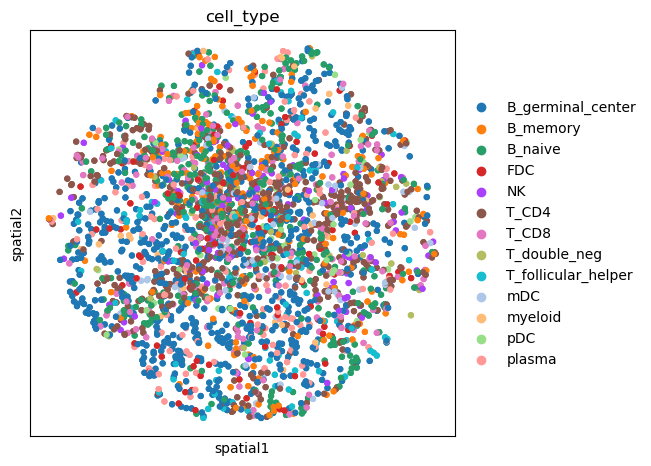

In [43]:
sq.pl.spatial_scatter(ad_tonsil_spat, shape=None, color="cell_type", size=50)